Homework1
Kail Roman (limpopo)

In [85]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
%matplotlib inline

from sklearn.cross_validation import train_test_split

In [86]:
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

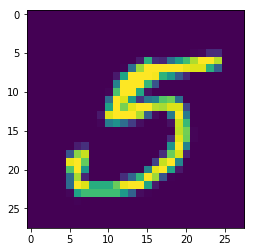

In [87]:
# Пример, как можно визуализировать данные
plt.imshow(train['data'][1].reshape(28,28))

# Обучаем модель

In [88]:
# Реализуйте здесь обучение модели


# нормировка
mean = np.mean(train['data'], axis=1, keepdims = True)
std = np.std(train['data'], axis=1, keepdims = True)
X = (train['data'] - mean) / (std + 0.000001)
y = (train['labels'] - 5.5) * 2

print ('yshape = %s' % (y.shape[0]))

# добавляем единичную колонку для w0
X = np.hstack([ np.ones((X.shape[0], 1)), X])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

print ('X_train_shape0 = %s' % (X_train.shape[0]))
print ('X_train_shape1 = %s' % (X_train.shape[1]))

print ('X_test _shape0 = %s' % (X_test.shape[0]))
print ('X_test _shape1 = %s' % (X_test.shape[1]))

print ('Y_train_shape0 = %s' % (y_train.shape[0]))
print ('Y_test _shape0 = %s' % (y_test.shape[0]))






# Инициализируем веса случайны образом
np.random.seed()
w = np.random.normal(scale=0.001, size = X.shape[1])


vsegoEpochs = 20
stepsInEpoch_train = y_train.shape[0]
stepsInEpoch_test = y_test.shape[0]
L_train = [0]*vsegoEpochs
L_test  = [0]*vsegoEpochs
Acc_train = [0]*vsegoEpochs
Acc_test  = [0]*vsegoEpochs
epochNumber = 0
for iter in tqdm.tqdm_notebook(range(vsegoEpochs)):
    l_train = 0
    l_test  = 0
    for i in range (stepsInEpoch_train) :     #epoch
        #j = np.random.randint(0, X_train.shape[0])
        #print ('pokazatel` = %s' % np.dot(w.T, X[i]))
        #exponent = math.exp(y_train[i] * np.dot(w.T, X_train[i]))
        #print (exponent)
        
        pok = y_train[i] * np.dot(w.T, X_train[i])
        if (pok > 500) :      # если слишком большой показатель у экспоненты то ругается
            pok = 500
        exponent = math.exp(pok)
        
        grad = - (y_train[i] * X_train[i]) / (1 + exponent) + 0.005 * w
        w = w - 0.001 * grad
        l_train = l_train + math.log((1 + exponent) / (exponent))
    for i in range (0, stepsInEpoch_test) :
        pok = y_test[i] * np.dot(w.T, X_test[i])
        if (pok > 500) :      # если слишком большой показатель у экспоненты то ругается
            pok = 500
        exponent = math.exp(pok)
        l_test  = l_test + math.log((1 + exponent) / (exponent))
            
    for i in range(stepsInEpoch_train) :
        if (  ((y_train[i] < 0) and (np.dot(w.T, X_train[i]) < 0)) or ((y_train[i] > 0) and (np.dot(w.T, X_train[i]) > 0))  ):
            Acc_train[epochNumber] += 1
    for i in range(stepsInEpoch_test) :
        if (  ((y_test[i]  < 0) and (np.dot(w.T, X_test [i]) < 0)) or ((y_test [i] > 0) and (np.dot(w.T, X_test [i]) > 0))  ):
            Acc_test[epochNumber] += 1
    
        
        
    L_train[epochNumber] = l_train / stepsInEpoch_train
    L_test [epochNumber] = l_test  / stepsInEpoch_test
    Acc_train[epochNumber] /= stepsInEpoch_train
    Acc_test [epochNumber] /= stepsInEpoch_test
    
    epochNumber = epochNumber + 1
        
#print (L)
#plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k')

asixX = np.linspace (0, vsegoEpochs, vsegoEpochs)
#plt.title ('lossfunc')
#plt.plot(asixX, L_train, 'o', label='train')
#plt.plot(asixX, L_test , 'x', label='test ')
#plt.legend()
        
i = 0
nTrue = 0
for i in range(y.shape[0]) :
    if (  ((y[i] < 0) and (np.dot(w.T, X[i]) < 0)) or ((y[i] > 0) and (np.dot(w.T, X[i]) > 0))  ):
        nTrue = nTrue + 1

print ('success : %s out of 10000' % (nTrue))
    

    

yshape = 10000
X_train_shape0 = 7500
X_train_shape1 = 785
X_test _shape0 = 2500
X_test _shape1 = 785
Y_train_shape0 = 7500
Y_test _shape0 = 2500



success : 9849 out of 10000


# Оцениваем результат

Обязательно отрисуйте 2 графика:
- loss на обучающем и тестовом множесте
- % правильно классифицированных примеров на тестовом и обучающем множестве

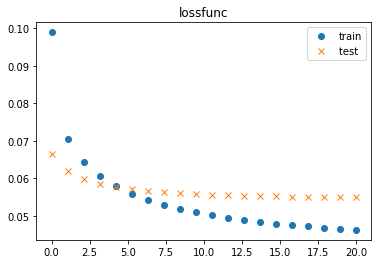

In [89]:
asixX = np.linspace (0, vsegoEpochs, vsegoEpochs)
plt.title ('lossfunc')
plt.plot(asixX, L_train, 'o', label='train')
plt.plot(asixX, L_test , 'x', label='test ')
plt.legend()

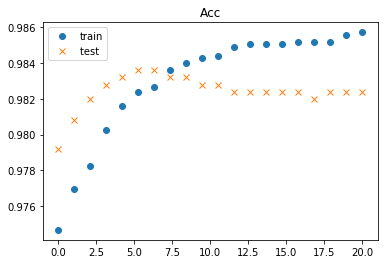

In [90]:
plt.title('Acc')
plt.plot(asixX, Acc_train, 'o', label='train')
plt.plot(asixX, Acc_test , 'x', label='test ')
plt.legend()

# Сохраняем данные для кагла

https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528

Результат записывается в простой текстовый файл. Первая строчка "Id,Prediction", далее для каждого примера из валидационного множества записывается его Id (порядковый номер, с нуля) и вероятность принадлежности к классу '6', например '123,0.12'.

Важно соблюдать тот же порядок следования элементов, что и в наборе данных. Нумерация id с 0

In [91]:
#X = test_no_lables['data']

mean = np.mean(test_no_lables['data'], axis=1, keepdims = True)
std = np.std(test_no_lables['data'], axis=1, keepdims = True)
X = (test_no_lables['data'] - mean) / (std + 0.000001)
#y = (train['labels'] - 5.5) * 2

X = np.hstack([ np.ones((X.shape[0], 1)), X])

# compute Y_pred

print ('x1size = %s, x2size = %s' % (X.shape[0], X.shape[1]))

Y_pred = [0]*X.shape[0]
a = 0
for iter in tqdm.tqdm_notebook(range(X.shape[0])):
    #a = np.dot (w.T, X[i]) 
    #print (- np.dot (w.T, X[i]))
    argument = - np.dot (w.T, X[a])
    if (argument > 700) :
        argument = 700
    #print (argument)
    Y_pred[a] = 1 / (1 + math.exp (argument))
    a = a + 1


with open('solution.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(X.shape[0]):
        print(i, Y_pred[i], sep=',', file=fout)

x1size = 3189, x2size = 785


# Сдача

1. Регистрируетесь на конкурс https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528 
1. Преодолеваете "Pass level" baseline
1. После того, как вы преодолеете baseline, присылайте ноутбук с решение по адресу voropaev@corp.mail.ru


# Внимание
- Пишите тему письм в формате "[МИФИ][1] Фамилия"
- Внутри писма прикрепляете файл ноутбука с именем family.ipynb
- Обязательно указывайте ваш ник на kaggle